### Exporting data from google earth engine as .tif

In [53]:
import pandas as pd
import numpy as np
import geopandas as gpd
import rasterio as rio
from affine import Affine
import xarray as xr
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pyplot as plt

In [57]:
# Data paths
fire = '../../finalproj_data/finalprojectdata/firemax_decwk22.tif' #uint8
air = '../../finalproj_data/finalprojectdata/air_decwk13.tif' #float32
precip = '../../finalproj_data/finalprojectdata/precip_decwk22.tif' #float32
veg = '../../finalproj_data/finalprojectdata/veg_decwk22.tif' #uint16

In [68]:
# fire = rasterio.open('../../finalproj_data/finalprojectdata/firemax_decwk22.tif')
# air = rasterio.open('../../finalproj_data/finalprojectdata/air_decwk13.tif')
# precip = rasterio.open('../../finalproj_data/finalprojectdata/precip_decwk22.tif')
# veg = rasterio.open('../../finalproj_data/finalprojectdata/veg_decwk22.tif')

In [70]:
# Use this code to check datatype of bands in each file
# {i: dtype for i, dtype in zip(veg.indexes, veg.dtypes)}

In [58]:
file_list = [fire, air, precip, veg]

# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(file_list))

# Read each layer and write it to stack
with rasterio.open('stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

ValueError: the array's dtype 'float32' does not match the file's dtype 'uint8'

In [35]:
fire.indexes

(1,)

In [36]:
firemask = fire.read(1)

In [39]:
(firemask==7).sum()

2

In [15]:
fire.crs

CRS.from_epsg(4326)

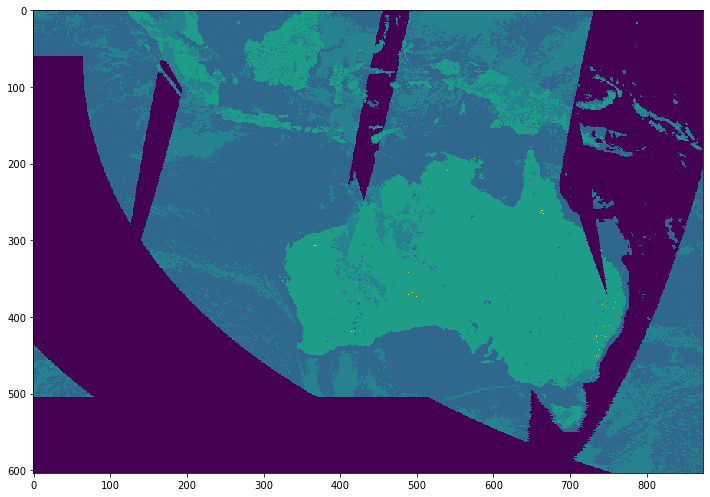

In [40]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(firemask, ax=ax)
plt.show()